**In This notebook we have done some data visualization for :**
- Checking for missing values
- Data Sanity Checks
- Outlier Capping
- Basic Analysis of the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
# sns.set()
from sklearn.model_selection import train_test_split
from collections import Counter
import random
# import logging

In [2]:
df=pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.shape

(30000, 25)

In [4]:
df.drop('ID',axis=1,inplace=True)

###  CHECKING FOR NULL VALUES

In [8]:
df.isnull().sum(axis=0)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## TARGET ANALYSIS

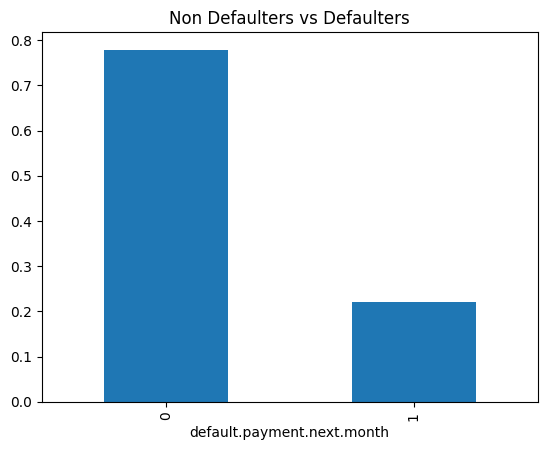

In [9]:
df['default.payment.next.month'].value_counts(normalize=True).plot.bar()
plt.title('Non Defaulters vs Defaulters')
plt.show()

**Inference**
- prob_default=0.22
- Imbalanced data

### SEX EDUCATION MARRIAGE

-  SEX: Gender (1=male, 2=female)
-  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
-  MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [10]:
df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


- Education and marriage have a category 0 which is unknown

In [11]:
# Replacing 0 of marriage with 3(others)

df['MARRIAGE']=df['MARRIAGE'].replace({0:3})

In [12]:
# Replacing 0,5,6 with 4

df['EDUCATION']=df['EDUCATION'].replace({0:4,5:4,6:4})

In [13]:
df['MARRIAGE']=df['MARRIAGE'].replace({1:'married',2:'single',3:'others'})
df['EDUCATION']=df['EDUCATION'].replace({1:'graduate school',2:'university',3:'high school',4:'others'})
df['SEX']=df['SEX'].replace({1:'male', 2:'female'})

In [18]:
df[['MARRIAGE']].value_counts()

MARRIAGE
single      15964
married     13659
others        377
Name: count, dtype: int64

In [28]:
def plot_categoric(cat_col):
    
    
    plt.title('{0} vs DEFAULT PROBABILITY'.format(cat_col))
    df.groupby(cat_col)['default.payment.next.month'].mean().plot.bar()
    plt.show()

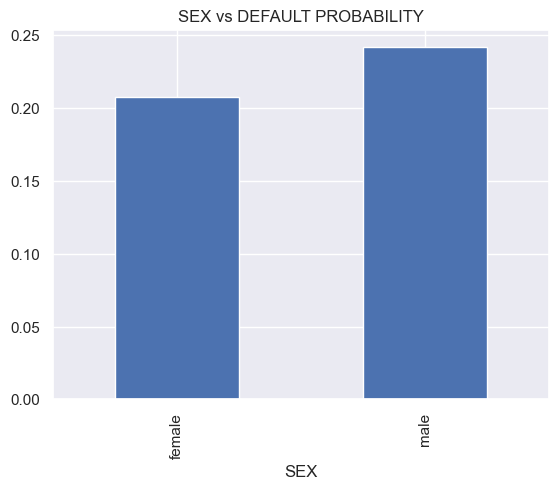

In [29]:
plot_categoric('SEX')

- Men are more likely to default than feamles 

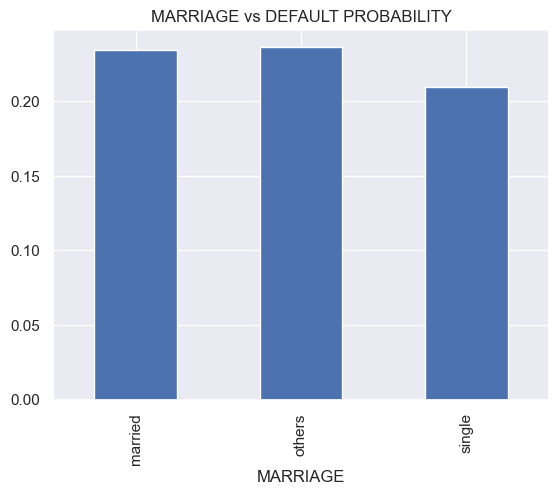

In [30]:
plot_categoric('MARRIAGE')

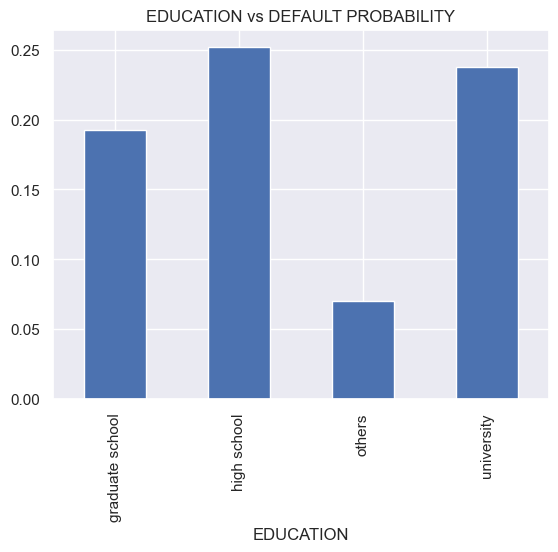

In [31]:
plot_categoric('EDUCATION')

**Inference On Categoric Variables**

- University and high school people are more likely to default.
- Married People are more likely to default.
- Males are more likely to default 

### Limit Balance And Influence On Target Var

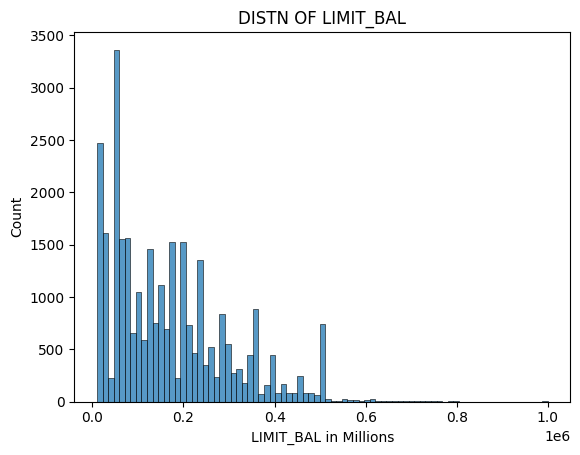

In [25]:
sns.histplot(df['LIMIT_BAL'])
plt.title('DISTN OF LIMIT_BAL')
plt.xlabel('LIMIT_BAL in Millions')
plt.show()

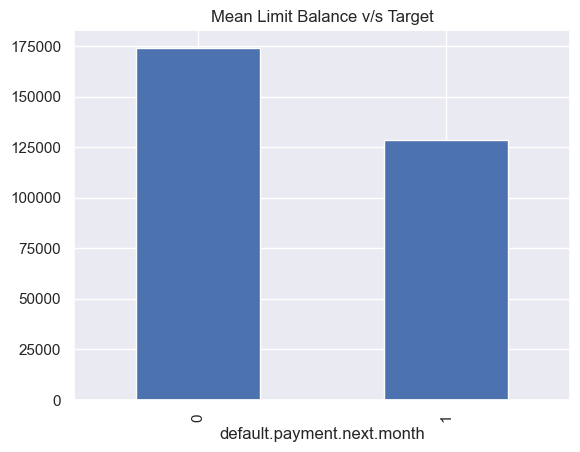

In [33]:
df.groupby('default.payment.next.month')['LIMIT_BAL'].mean().plot.bar()
plt.title('Mean Limit Balance v/s Target')
plt.show()

**Inference**
- Very few have a high limit balance 
- Those who do not default have a higher limit balance

### AGE And Influence On Target

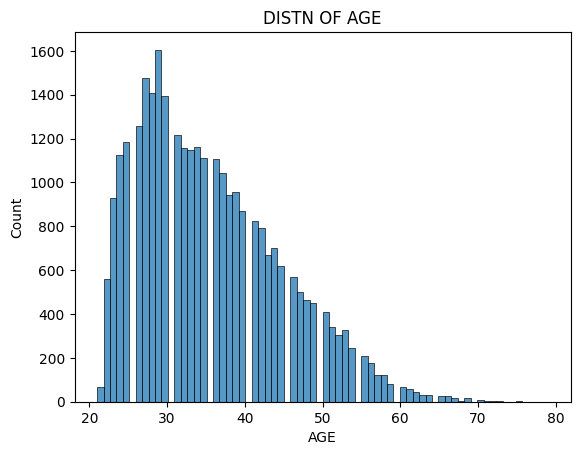

In [29]:
sns.histplot(df['AGE'])
plt.title('DISTN OF AGE')
plt.show()

- Most people are in late 20's and early 30's

### ANALYSING NUMERIC FEATURES FOR OUTLIERS

#### 1.Limit Balance

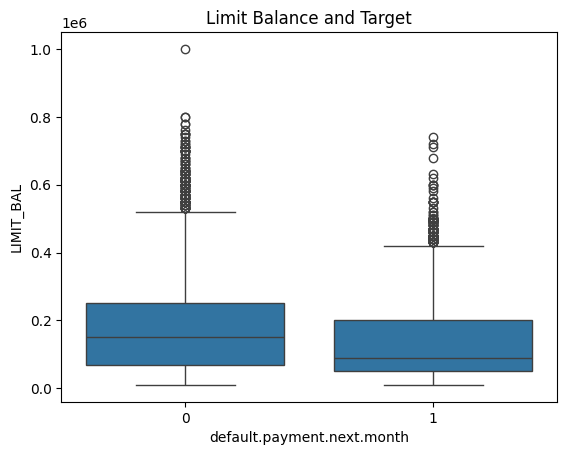

In [33]:
sns.boxplot(x=df['default.payment.next.month'],y=df['LIMIT_BAL'],data=df)
plt.title('Limit Balance and Target')
plt.show()

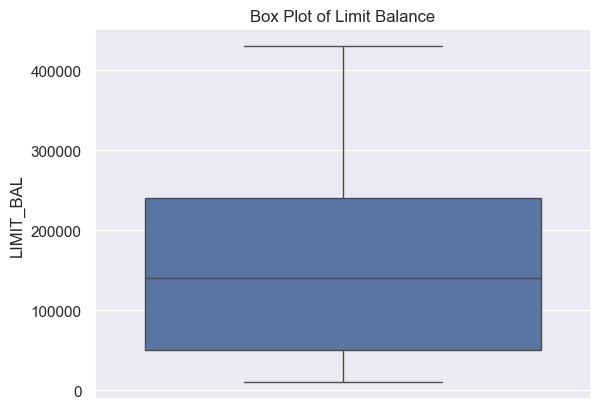

In [36]:
sns.boxplot(df['LIMIT_BAL'])
plt.title('Box Plot of Limit Balance')
plt.show()

In [37]:
df['LIMIT_BAL'].describe()

count     30000.000000
mean     164061.989333
std      121035.014953
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      430000.000000
Name: LIMIT_BAL, dtype: float64

**Capping to 95%**

In [38]:
df.loc[df['LIMIT_BAL']>=df['LIMIT_BAL'].quantile(0.95),'LIMIT_BAL']=df['LIMIT_BAL'].quantile(0.95)

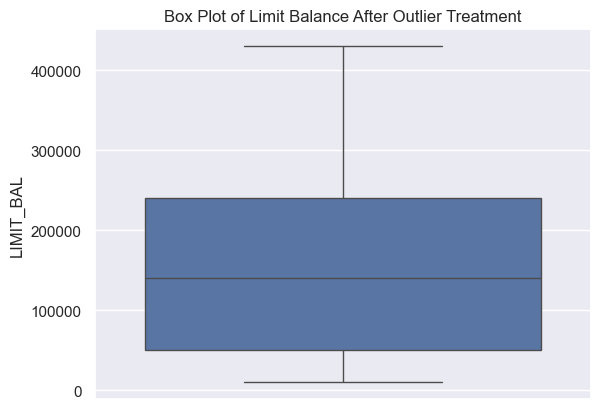

In [39]:
# Checking the outliers now
sns.boxplot(df['LIMIT_BAL'])
plt.title('Box Plot of Limit Balance After Outlier Treatment')
plt.show()

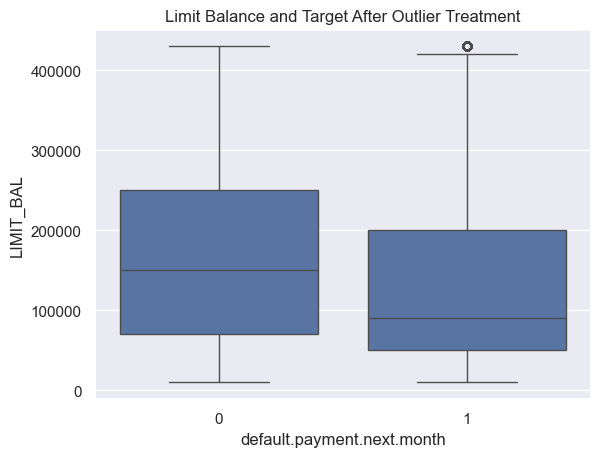

In [40]:
sns.boxplot(x=df['default.payment.next.month'],y=df['LIMIT_BAL'],data=df)
plt.title('Limit Balance and Target After Outlier Treatment')
plt.show()

#### 2.BILL AMT (1-6)

In [41]:
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


- Handling negative values 


In [45]:
for i in range(1,7):
    feature='BILL_AMT'+str(i)+'_POS'
    df[feature]=df['BILL_AMT'+str(i)].apply(lambda x:1 if x>=0 else 0)

In [46]:
for i in range(1,6):
    feature='BILL_AMT'+str(i)
    df[feature]=df[feature].apply(lambda x:abs(x))

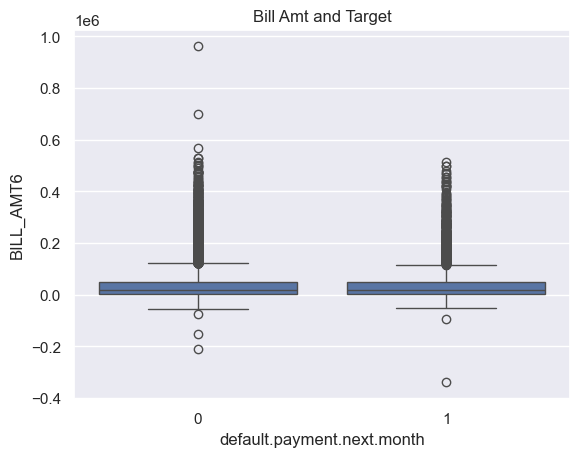

In [47]:
sns.boxplot(x=df['default.payment.next.month'],y=df['BILL_AMT6'],data=df)
plt.title('Bill Amt and Target')
plt.show()

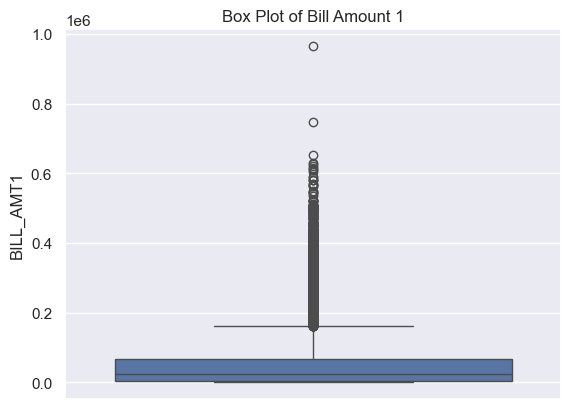

In [48]:
sns.boxplot(df['BILL_AMT1'])
plt.title('Box Plot of Bill Amount 1')
plt.show()

- Bill amount variables do not show much variability with the target 
- Capping them at 95%

In [49]:
def cap_upper(df,feature,limit):
    
    percentile_limit=df[feature].quantile(limit)
    df.loc[df[feature]>=percentile_limit,feature]=percentile_limit
    return df[feature]

In [50]:
for i in range(1,6):
    feature='BILL_AMT'+str(i)
    df[feature]=cap_upper(df,feature,limit=0.95)

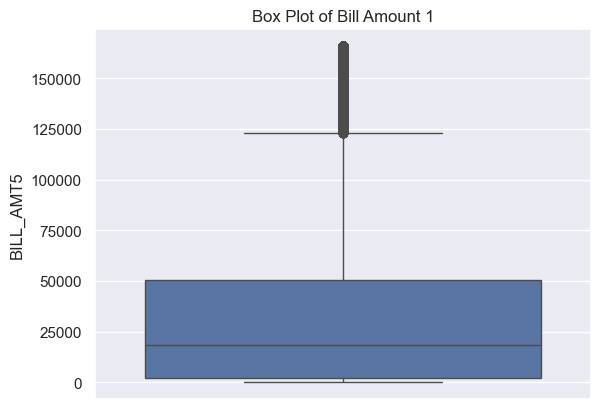

In [51]:
sns.boxplot(df['BILL_AMT5'])
plt.title('Box Plot of Bill Amount 1')
plt.show()

#### 3.PAY_AMT

In [52]:
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe(percentiles=[0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.98])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
80%,6192.200000,6.000000e+03,5284.00000,5000.000000,5000.000000,5000.000000
85%,8000.000000,7.956150e+03,7000.00000,6300.000000,6271.300000,6200.000000
90%,10300.000000,1.040110e+04,10000.00000,9570.600000,9500.000000,9600.000000


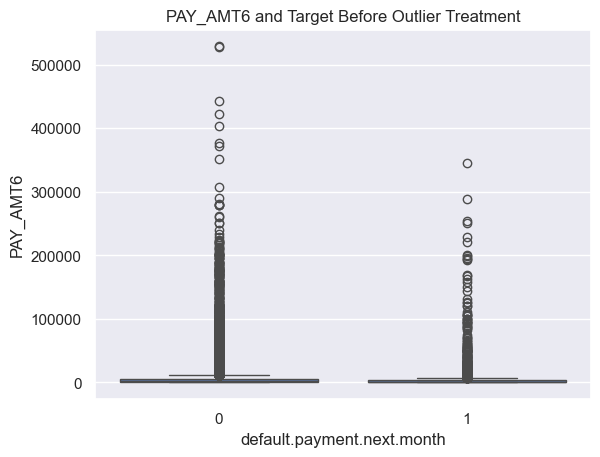

In [53]:
sns.boxplot(x=df['default.payment.next.month'],y=df['PAY_AMT6'],data=df)
plt.title('PAY_AMT6 and Target Before Outlier Treatment')
plt.show()

In [54]:
for i in range(1,7):
    feature='PAY_AMT'+str(i)
    df[feature]=cap_upper(df,feature,limit=0.90)

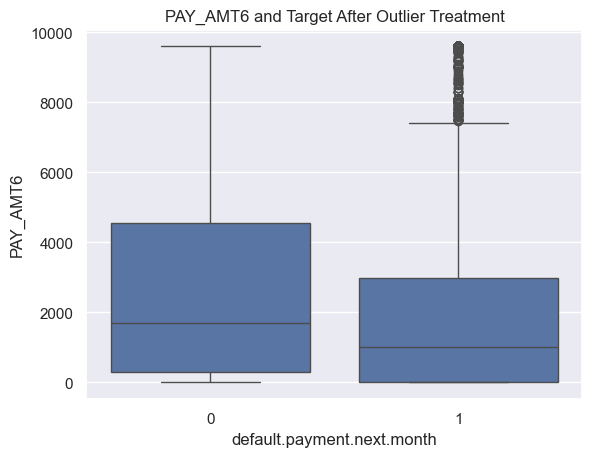

In [55]:
sns.boxplot(x=df[c],y=df['PAY_AMT6'],data=df)
plt.title('PAY_AMT6 and Target After Outlier Treatment')
plt.show()

In [56]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_AMT1_POS,BILL_AMT2_POS,BILL_AMT3_POS,BILL_AMT4_POS,BILL_AMT5_POS,BILL_AMT6_POS
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,1,1,1,1,1,1,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,1000.0,0.0,2000.0,1,1,1,1,1,1,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,1000.0,1000.0,5000.0,0,1,1,1,1,1,1
3,50000.0,female,university,married,37,0,0,0,0,0,...,1100.0,1069.0,1000.0,0,1,1,1,1,1,1
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,9000.0,689.0,679.0,0,1,1,1,1,1,1
